# Study of the process of modulation of biomedical signals 

Krasivicheva A. V. BMT1-81

In [2]:
import numpy as np
from matplotlib import pylab as plt
from scipy import interpolate

Read signal from file 7.txt:

In [3]:
# function of reading from a file 
def open_file(name_of_file): 
    values =[] # an empty array for the values of the signal
    with open(name_of_file) as file: # open the file
        for line in file: # reading line by line
            line = line.strip().split('\t') # read the value in the second column of each line 
            value = float(line[1]) # change the variable type to float
            values.append(value) # write the value to the array 
        return values # return an array of data from the second column
    close(name_of_file) #  close the file

In [4]:
arr = open_file('7.txt') # function call

Plotting the initial signal in time-value coordinates

Populating the interactive namespace from numpy and matplotlib


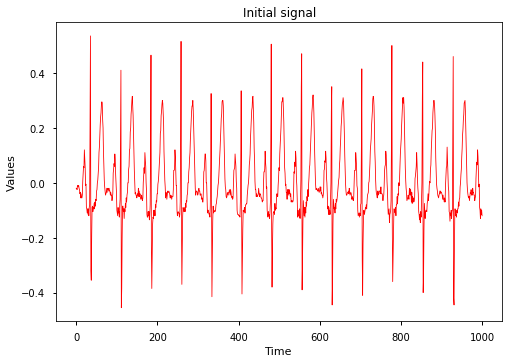

In [80]:
%pylab inline 
plt.style.use('seaborn-notebook') # define the graph presentation style
plt.title('Initial signal')
plot(open_file('7.txt'), 'r', linewidth = 0.8) #  plotting function
xlabel('Time') # label for X-axis
ylabel('Values') # label for Y-axis
plt.show()

In [79]:
time_old = np.arange(0,10000,10) # create an array of values corresponding to the time value from the source file
C = abs(np.fft.fft(arr)) # find the coefficients of DFT
freq = np.fft.fftfreq(len(time_old), d=10) # carry out the transition to the frequency domain  

Plotting the initial signal spectrum frequency-spectrum coordinates

Populating the interactive namespace from numpy and matplotlib


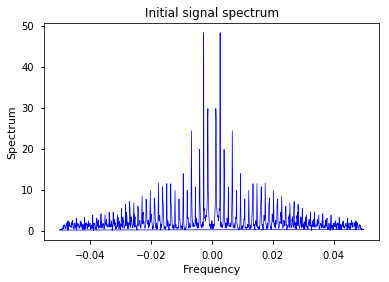

In [84]:
%pylab inline
plt.plot(freq,C,'b', linewidth = 0.7) #  plotting function
plt.title('Initial signal spectrum')
xlabel('Frequency') # label for X-axis
ylabel('Spectrum') # label for Y-axis
plt.show()

Linear interpolation of the initial signal:

In [12]:
time_new = np.arange(0,10000,0.1) #  set a new sequence of time counts  
values_new = np.interp(time_new, time_old, arr) # get interpolated values at time_new points

Plotting the initial points of the signal and the points obtained by interpolation:

Populating the interactive namespace from numpy and matplotlib


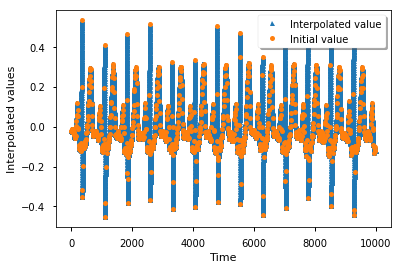

In [83]:
%pylab inline
plt.plot( time_new, values_new, '^', time_old, arr, 'o', markersize=5) #  plotting function
xlabel('Time') # label X-axis
ylabel('Interpolated values') # label Y-axis
plt.legend(('Interpolated value', 'Initial value'),
           loc='best', shadow=True)
plt.show()

Enlarged:

Populating the interactive namespace from numpy and matplotlib


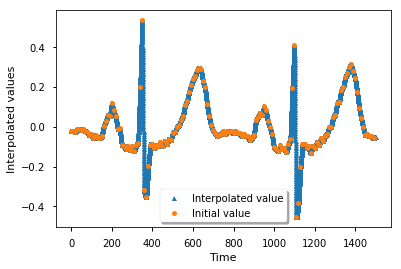

In [85]:
time_short= np.arange(0,1500,0.1) 
%pylab inline
plt.plot( time_short, values_new[:15000], '^', time_old[:150], arr[:150], 'o' , markersize = 5) #  plotting function
plt.legend(('Interpolated value', 'Initial value'),
           loc='best', shadow=True)
xlabel('Time') # label X-axis
ylabel('Interpolated values') # label Y-axis
plt.show()

 Plotting the spectrum of the interpolated signal:

In [21]:
C_new = abs(np.fft.fft(values_new)) # DFT
freq_new = np.fft.fftfreq(len(values_new), d=0.1) # carry out the transition to the frequency domain  

Populating the interactive namespace from numpy and matplotlib


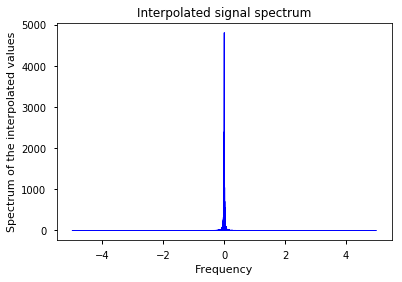

In [86]:
%pylab inline
plt.plot(freq_new,C_new, 'b', linewidth = 0.7) #plotting function
xlabel('Frequency') # label X-axis
ylabel('Spectrum of the interpolated values') # label Y-axis
plt.title('Interpolated signal spectrum')
plt.show()

Multiplying the initial signal by sin(w0t), w0=100, plotting the received signal and its spectrum:

In [24]:
w0 = 100 # set the sine frequency
i=0 # auxiliary variable for while loop
values_sin = [] # empty array for values
while i < len(values_new): 
    value_sin = values_new[i]*sin(w0*time_new[i]) # multiplying each signal value by the corresponding sine value
    values_sin.append(value_sin)  # write the value to the array 
    i = i+1

The signal received after processing:

Populating the interactive namespace from numpy and matplotlib


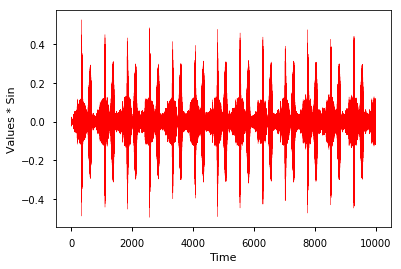

In [25]:
%pylab inline
plt.plot( time_new, values_sin, 'r', linewidth = 0.3) # plotting function
xlabel('Time') # label X-axis
ylabel('Values * Sin') # label Y-axis
plt.show()

Enlarged:

Populating the interactive namespace from numpy and matplotlib


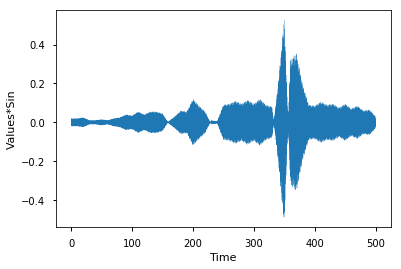

In [27]:
%pylab inline
time_short= np.arange(0,500,0.1)
plt.plot( time_short, values_sin[:5000], linewidth = 0.2) # plotting function
xlabel('Time') # label X-axis
ylabel('Values*Sin') # label Y-axis
plt.show()

The spuctrum: 

In [29]:
C_sin = abs(np.fft.fft(values_sin)) # DFT
freq_sin = np.fft.fftfreq(len(values_sin), d=0.1)  # carry out the transition to the frequency domain 

Populating the interactive namespace from numpy and matplotlib


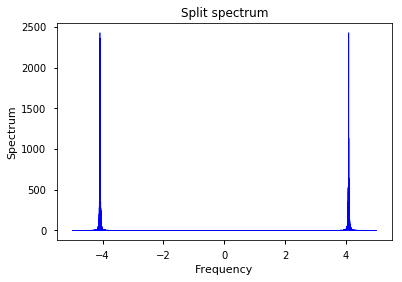

In [87]:
%pylab inline
plt.plot(freq_sin, C_sin, 'b', linewidth = 0.7) # plotting function
plt.title('Split spectrum')
xlabel('Frequency') # label X-axis
ylabel('Spectrum') # label Y-axis
plt.show()

# Signal modulation

## 1. Amplitude modulation, variation of amplitude modulation index

                   UAM(t)=U0∙[1+m∙X(t)]∙sin⁡(ω0∙t+φ0)
                   
                   U0 – amplitude of the carrier oscillation, mV;
                   m – -amplitude modulation index;
                   X(t) –  normalized signal-message ([–1; 1]);
                   ω0 – circular frequency of the carrier oscillation, rad/s;
                   φ0 –  phase of the carrier oscillation, rad.


Normalization of the initial signal values:

In [31]:
values_norm = [] # an empty array for the normalized value 
i=0 # auxiliary variable for while loop
max_value = 1/max(values_new) # maximum value selection
while i < len(values_new):
    value_norm = values_new[i]*max_value # normalize each value
    values_norm.append(value_norm) # write the value to the array 
    i = i+1

Populating the interactive namespace from numpy and matplotlib


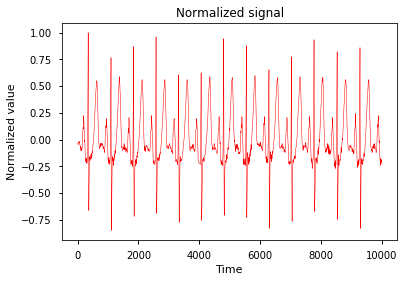

In [88]:
%pylab inline
plt.plot( time_new, values_norm, 'r', linewidth = 0.5) # plotting function 
plt.title('Normalized signal')
xlabel('Time') # label X-axis
ylabel('Normalized value') # labek Y-axis
plt.show()

Spectrum of the normalized signal:

In [35]:
C_norm = abs(np.fft.fft(values_norm)) # DFT
freq_norm = np.fft.fftfreq(len(values_norm), d=0.1) # carry out the transition to the frequency domain 

Populating the interactive namespace from numpy and matplotlib


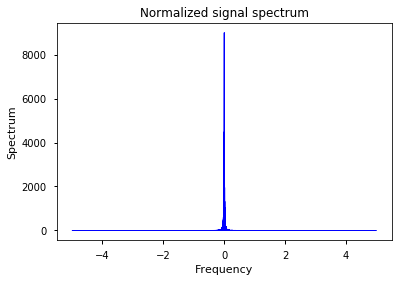

In [89]:
%pylab inline
plt.plot(freq_norm, C_norm, 'b', linewidth = 0.7) # plotting function 
plt.title('Normalized signal spectrum')
xlabel('Frequency') # label X-axis
ylabel('Spectrum') # Label Y-axis
plt.show()

###  Carrying out amplitude modulation of a signal at various values of m, plotting the received signals and their spectra:

In [37]:
def amplitude_modulation(m): # the function of amplitude modulation
    am_values=[] # an empty array for the am-value 
    i=0 # auxiliary variable for while loop
    w0=100 # set the sine frequency
    while i < len(values_new):
        am_value = (1+ m*values_norm[i])*sin(w0*time_new[i]) # modulate the signal
        am_values.append(am_value) # write the value to the array 
        i = i+1
    return am_values # return an array of am-value

#### m = 1

Populating the interactive namespace from numpy and matplotlib


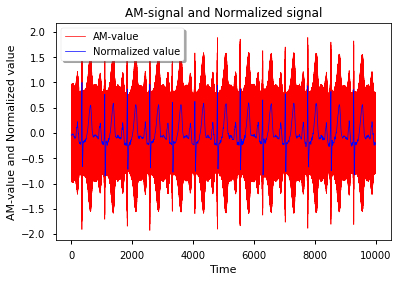

Populating the interactive namespace from numpy and matplotlib


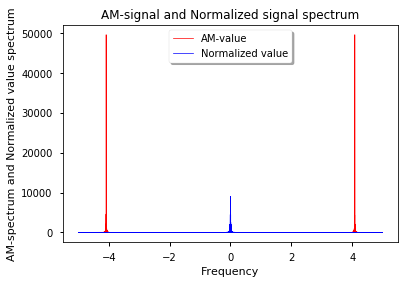

In [90]:
%pylab inline
plt.plot(time_new, amplitude_modulation(1), 'r', time_new, values_norm, 'b', linewidth = 0.7) # Calling the am-modulation function
# plotting the modulated signal and the normalized signal
xlabel('Time') # label X-axis
ylabel('AM-value and Normalized value') # label Y-axis
plt.title('AM-signal and Normalized signal')
plt.legend(('AM-value', 'Normalized value'),
           loc='best', shadow=True)
plt.show()

%pylab inline
plt.plot(freq_norm, abs(np.fft.fft(amplitude_modulation(1))), 'r', freq_norm, C_norm, 'b', linewidth = 0.7)
# Calling the am-modulation function and DFT
# plotting spectra of the modulated signal and of the normalized signal
xlabel('Frequency') # label X-axis
ylabel('AM-spectrum and Normalized value spectrum') # label Y-axis
plt.title('AM-signal and Normalized signal spectrum')
plt.legend(('AM-value', 'Normalized value'),
           loc='best', shadow=True)
plt.show()

#### m = 0.7

Populating the interactive namespace from numpy and matplotlib


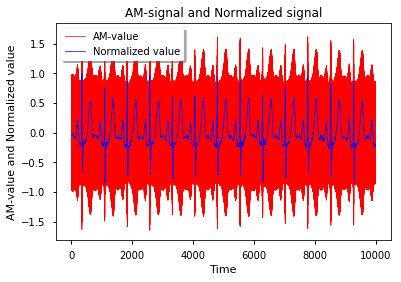

Populating the interactive namespace from numpy and matplotlib


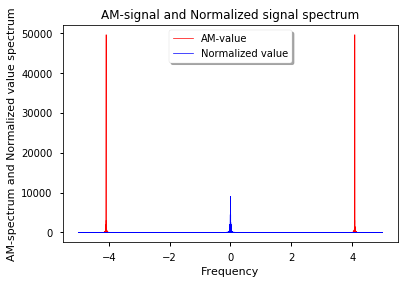

In [91]:
%pylab inline
plt.plot(time_new, amplitude_modulation(0.7), 'r', time_new, values_norm, 'b', linewidth = 0.7) # Calling the am-modulation function
# plotting the modulated signal and the normalized signal
xlabel('Time') # label X-axis
ylabel('AM-value and Normalized value') # label Y-axis
plt.title('AM-signal and Normalized signal')
plt.legend(('AM-value', 'Normalized value'),
           loc='best', shadow=True)
plt.show()

%pylab inline
plt.plot(freq_norm, abs(np.fft.fft(amplitude_modulation(0.7))), 'r', freq_norm, C_norm, 'b', linewidth = 0.7)
# Calling the am-modulation function and DFT
# plotting spectra of the modulated signal and of the normalized signal
xlabel('Frequency') # label X-axis
ylabel('AM-spectrum and Normalized value spectrum') # label Y-axis
plt.title('AM-signal and Normalized signal spectrum')
plt.legend(('AM-value', 'Normalized value'),
           loc='best', shadow=True)
plt.show()

### m = 0.3

Populating the interactive namespace from numpy and matplotlib


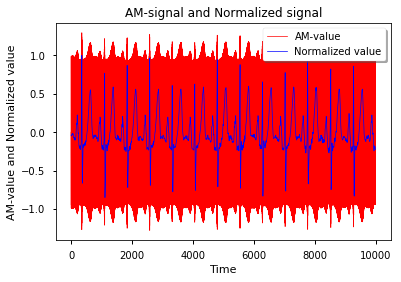

Populating the interactive namespace from numpy and matplotlib


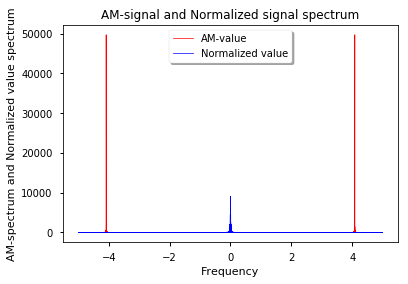

In [92]:
%pylab inline
plt.plot(time_new, amplitude_modulation(0.3), 'r', time_new, values_norm, 'b', linewidth = 0.7) # Calling the am-modulation function
# plotting the modulated signal and the normalized signal
xlabel('Time') # label X-axis
ylabel('AM-value and Normalized value') # label Y-axis
plt.title('AM-signal and Normalized signal')
plt.legend(('AM-value', 'Normalized value'),
           loc='best', shadow=True)
plt.show()

%pylab inline
plt.plot(freq_norm, abs(np.fft.fft(amplitude_modulation(0.3))), 'r', freq_norm, C_norm, 'b', linewidth = 0.7)
# Calling the am-modulation function and DFT
# plotting spectra of the modulated signal and of the normalized signal
xlabel('Frequency') # label X-axis
ylabel('AM-spectrum and Normalized value spectrum') # label Y-axis
plt.title('AM-signal and Normalized signal spectrum')
plt.legend(('AM-value', 'Normalized value'),
           loc='best', shadow=True)
plt.show()

#### m = 1.5

Populating the interactive namespace from numpy and matplotlib


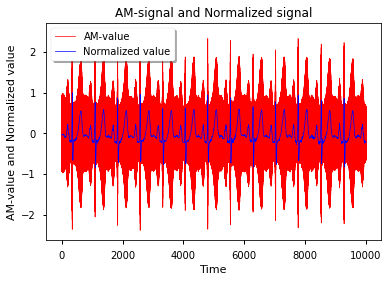

Populating the interactive namespace from numpy and matplotlib


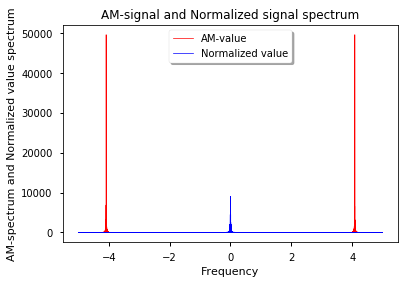

In [93]:
%pylab inline
plt.plot(time_new, amplitude_modulation(1.5), 'r', time_new, values_norm, 'b', linewidth = 0.7) # Calling the am-modulation function
# plotting the modulated signal and the normalized signal
xlabel('Time') # label X-axis
ylabel('AM-value and Normalized value') # label Y-axis
plt.title('AM-signal and Normalized signal')
plt.legend(('AM-value', 'Normalized value'),
           loc='best', shadow=True)
plt.show()

%pylab inline
plt.plot(freq_norm, abs(np.fft.fft(amplitude_modulation(1.5))), 'r', freq_norm, C_norm, 'b', linewidth = 0.7)
# Calling the am-modulation function and DFT
# plotting spectra of the modulated signal and of the normalized signal
xlabel('Frequency') # label X-axis
ylabel('AM-spectrum and Normalized value spectrum') # label Y-axis
plt.title('AM-signal and Normalized signal spectrum')
plt.legend(('AM-value', 'Normalized value'),
           loc='best', shadow=True)
plt.show()

## 2. Frequency modulation, variation of circular frequency deviation

                UЧМ (t)=U0∙sin⁡(ω0∙t+∆ω∙∫X(τ)dτ),
                
                U0 - amplitude of the carrier oscillation, mV;
                X (τ) - normalized signal-message (takes values [-1; 1]);
                ω0-circular frequency of the carrier oscillation, rad/s;
                ∆ω-deviation of the circular frequency, rad/s. (w)


In [51]:
def freq_modulation(w):  # the function of frequency modulation
    fm_values=[]  # an empty array for the fm-value 
    i=0 # auxiliary variable for while loop
    w0= 100 # set the sine frequency
    while i < len(values_new):
        fm_value = sin(w0*time_new[i] + w*summ[i]) # modulate the signal
        fm_values.append(fm_value) # write the value to the array 
        i = i+1
    return fm_values # return an array of fm-value

# For discrete signal values, the Integral is replaced by the sum:
summ = [] # an empty array for the sum-value 
summ_t = 0 # auxiliary variable for while loop
i=0 # auxiliary variable for while loop
t=0 # auxiliary variable for while loop
while i < len(time_new):
    while t <= i:
        summ_t = summ_t + values_norm[t] # summation of elements in the range from 0 to t  
        summ.append(summ_t) # write the value to the array 
        t = t+1
    i = i+1
    

### Carrying out frequency modulation of a signal at various values of w, plotting the received signals and their spectra:

#### w = 2pi

Populating the interactive namespace from numpy and matplotlib


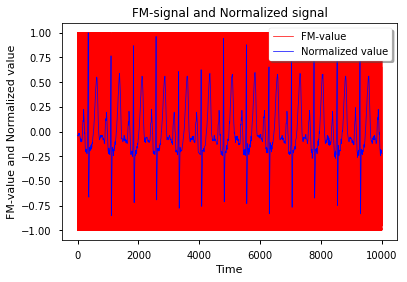

Populating the interactive namespace from numpy and matplotlib


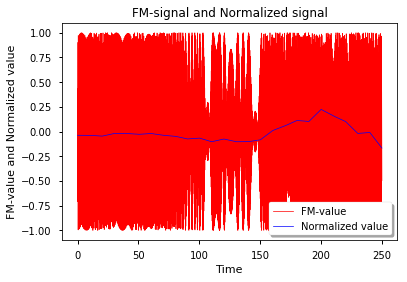

Populating the interactive namespace from numpy and matplotlib


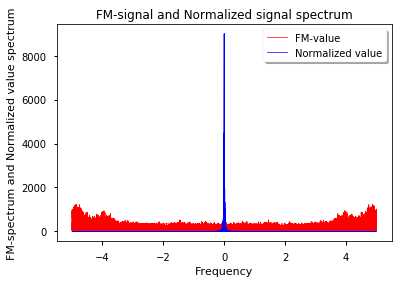

In [94]:
%pylab inline
plt.plot(time_new, freq_modulation(2*pi), 'r', time_new, values_norm, 'b', linewidth = 0.7)# Calling the fm-modulation function
# plotting the modulated signal and the normalized signal
xlabel('Time') # label X-axis
ylabel('FM-value and Normalized value') #label Y-axis
plt.title('FM-signal and Normalized signal')
plt.legend(('FM-value', 'Normalized value'),
           loc='best', shadow=True)
plt.show()

#Enlarged:
%pylab inline
time_short= np.arange(0,250,0.1)
plt.plot( time_short, freq_modulation(2*pi)[:2500], 'r', time_short, values_norm[:2500], 'b', linewidth = 0.7) # Calling the fm-modulation function
# plotting the modulated signal and the normalized signal
xlabel('Time') # label X-axis
ylabel('FM-value and Normalized value') #label Y-axis
plt.title('FM-signal and Normalized signal')
plt.legend(('FM-value', 'Normalized value'),
           loc='best', shadow=True)
plt.show()

%pylab inline
plt.plot(freq_norm, abs(np.fft.fft(freq_modulation(2*pi))), 'r', freq_norm, C_norm, 'b', linewidth = 0.7)
# Calling the fm-modulation function and DFT
# plotting spectra of the modulated signal and of the normalized signal
xlabel('Frequency') # label X-axis
ylabel('FM-spectrum and Normalized value spectrum') #label Y-axis
plt.title('FM-signal and Normalized signal spectrum')
plt.legend(('FM-value', 'Normalized value'),
           loc='best', shadow=True)
plt.show()


#### w = 10pi

Populating the interactive namespace from numpy and matplotlib


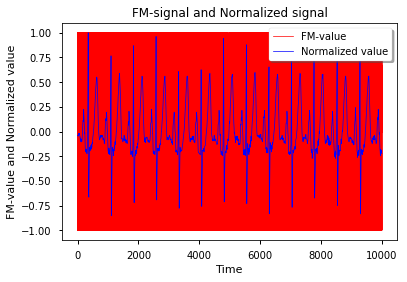

Populating the interactive namespace from numpy and matplotlib


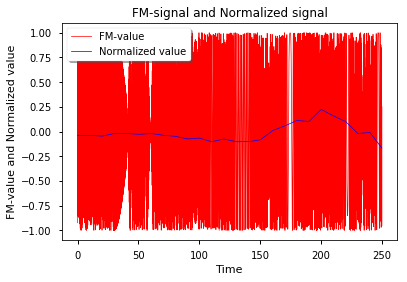

Populating the interactive namespace from numpy and matplotlib


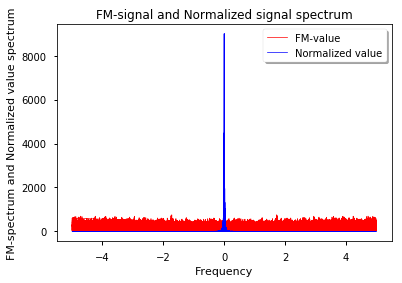

In [95]:
%pylab inline
plt.plot(time_new, freq_modulation(10*pi), 'r', time_new, values_norm, 'b', linewidth = 0.7)# Calling the fm-modulation function
# plotting the modulated signal and the normalized signal
xlabel('Time') # label X-axis
ylabel('FM-value and Normalized value') #label Y-axis
plt.title('FM-signal and Normalized signal')
plt.legend(('FM-value', 'Normalized value'),
           loc='best', shadow=True)
plt.show()

#Enlarged:
%pylab inline
time_short= np.arange(0,250,0.1)
plt.plot( time_short, freq_modulation(10*pi)[:2500], 'r', time_short, values_norm[:2500], 'b', linewidth = 0.7) # Calling the fm-modulation function
# plotting the modulated signal and the normalized signal
xlabel('Time') # label X-axis
ylabel('FM-value and Normalized value') #label Y-axis
plt.title('FM-signal and Normalized signal')
plt.legend(('FM-value', 'Normalized value'),
           loc='best', shadow=True)
plt.show()

%pylab inline
plt.plot(freq_norm, abs(np.fft.fft(freq_modulation(10*pi))), 'r', freq_norm, C_norm, 'b', linewidth = 0.7)
# Calling the fm-modulation function and DFT
# plotting spectra of the modulated signal and of the normalized signal
xlabel('Frequency') # label X-axis
ylabel('FM-spectrum and Normalized value spectrum') #label Y-axis
plt.title('FM-signal and Normalized signal spectrum')
plt.legend(('FM-value', 'Normalized value'),
           loc='best', shadow=True)
plt.show()


#### w = 100pi

Populating the interactive namespace from numpy and matplotlib


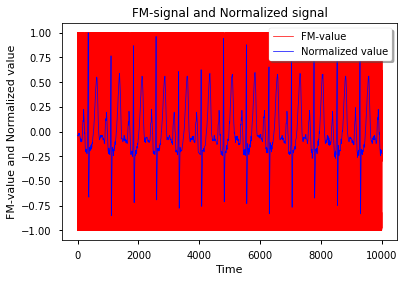

Populating the interactive namespace from numpy and matplotlib


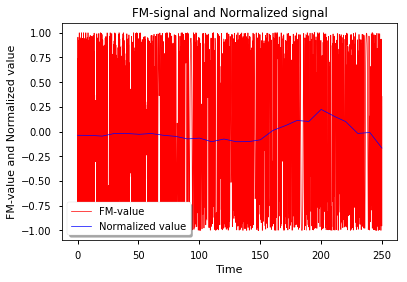

Populating the interactive namespace from numpy and matplotlib


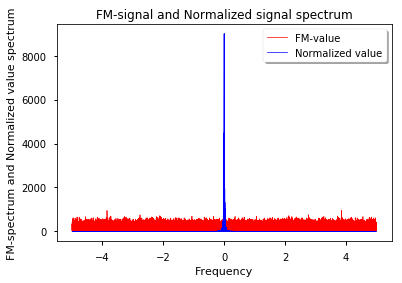

In [96]:
%pylab inline
plt.plot(time_new, freq_modulation(100*pi), 'r', time_new, values_norm, 'b', linewidth = 0.7)# Calling the fm-modulation function
# plotting the modulated signal and the normalized signal
xlabel('Time') # label X-axis
ylabel('FM-value and Normalized value') #label Y-axis
plt.title('FM-signal and Normalized signal')
plt.legend(('FM-value', 'Normalized value'),
           loc='best', shadow=True)
plt.show()

#Enlarged:
%pylab inline
time_short= np.arange(0,250,0.1)
plt.plot( time_short, freq_modulation(100*pi)[:2500], 'r', time_short, values_norm[:2500], 'b', linewidth = 0.7) # Calling the fm-modulation function
# plotting the modulated signal and the normalized signal
xlabel('Time') # label X-axis
ylabel('FM-value and Normalized value') #label Y-axis
plt.title('FM-signal and Normalized signal')
plt.legend(('FM-value', 'Normalized value'),
           loc='best', shadow=True)
plt.show()

%pylab inline
plt.plot(freq_norm, abs(np.fft.fft(freq_modulation(100*pi))), 'r', freq_norm, C_norm, 'b', linewidth = 0.7)
# Calling the fm-modulation function and DFT
# plotting spectra of the modulated signal and of the normalized signal
xlabel('Frequency') # label X-axis
ylabel('FM-spectrum and Normalized value spectrum') #label Y-axis
plt.title('FM-signal and Normalized signal spectrum')
plt.legend(('FM-value', 'Normalized value'),
           loc='best', shadow=True)
plt.show()


## 3. Phase modulation, variation of phase deviation

                 UФМ (t)=U0∙sin⁡(ω0∙t+∆φ∙X(t))
                 
                 U0 - amplitude of the carrier oscillation, mV;
                 X (t) – normalized signal-message (takes values [-1; 1]);
                 ω0 - circular frequency of the carrier oscillation, rad/ s;
                 ∆φ - the phase deviation, rad. (q)
               


In [52]:
def phase_modulation(q): # the function of phase modulation
    pm_values=[] # an empty array for the pm-value 
    i=0 # auxiliary variable for while loop
    w0=100 # set the sine frequency
    while i < len(values_norm):
        pm_value = sin(w0*time_new[i] + q*values_norm[i])  # modulate the signal
        pm_values.append(pm_value) # write the value to the array 
        i = i+1
    return pm_values # return an array of pm-value

### Carrying out phase modulation of a signal at various values of q, plotting the received signals and their spectra:

#### q = 10

Populating the interactive namespace from numpy and matplotlib


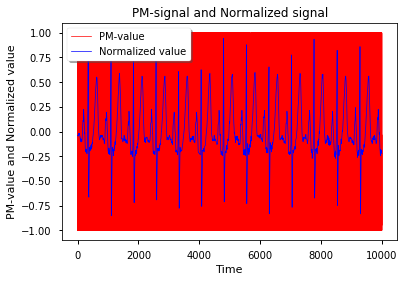

Populating the interactive namespace from numpy and matplotlib


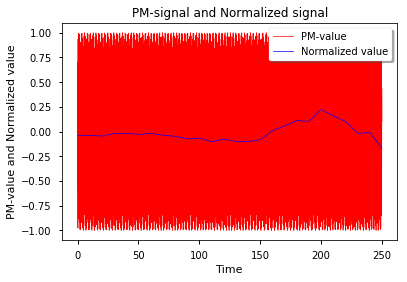

Populating the interactive namespace from numpy and matplotlib


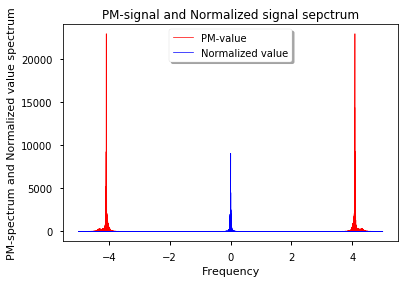

In [97]:
%pylab inline
plt.plot(time_new, phase_modulation(10), 'r', time_new, values_norm, 'b', linewidth = 0.7)# Calling the pm-modulation function
# plotting the modulated signal and the normalized signal
xlabel('Time') # label X-axis
ylabel('PM-value and Normalized value') # label Y-axis
plt.title('PM-signal and Normalized signal')
plt.legend(('PM-value', 'Normalized value'),
           loc='best', shadow=True)
plt.show()

#Enlarged:
%pylab inline
time_short= np.arange(0,250,0.1)
plt.plot( time_short, phase_modulation(10)[:2500], 'r', time_short, values_norm[:2500], 'b', linewidth = 0.7)
# Calling the pm-modulation function
# plotting the modulated signal and the normalized signal
xlabel('Time') # label X-axis
ylabel('PM-value and Normalized value') # label Y-axis
plt.title('PM-signal and Normalized signal')
plt.legend(('PM-value', 'Normalized value'),
           loc='best', shadow=True)
plt.show()


%pylab inline
plt.plot(freq_norm, abs(np.fft.fft(phase_modulation(10))), 'r', freq_norm, C_norm, 'b', linewidth = 0.7)
# Calling the pm-modulation function and DFT
# plotting the modulated signal and the normalized signal
xlabel('Frequency') # label X-axis
ylabel('PM-spectrum and Normalized value spectrum') # label Y-axis
plt.title('PM-signal and Normalized signal sepctrum')
plt.legend(('PM-value', 'Normalized value'),
           loc='best', shadow=True)
plt.show()


#### q = 1000

Populating the interactive namespace from numpy and matplotlib


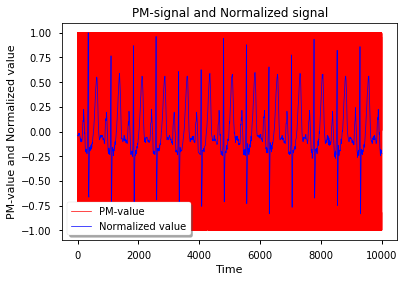

Populating the interactive namespace from numpy and matplotlib


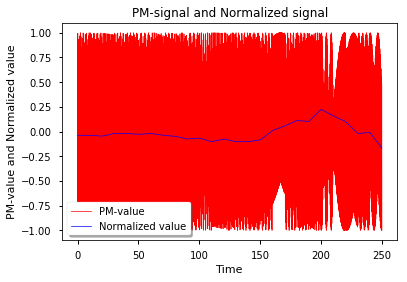

Populating the interactive namespace from numpy and matplotlib


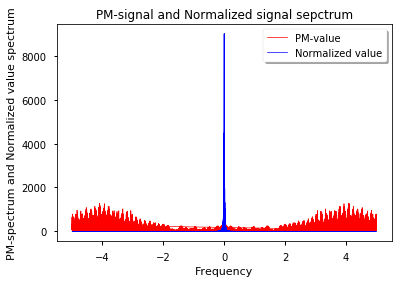

In [99]:
%pylab inline
plt.plot(time_new, phase_modulation(1000), 'r', time_new, values_norm, 'b', linewidth = 0.7)# Calling the pm-modulation function
# plotting the modulated signal and the normalized signal
xlabel('Time') # label X-axis
ylabel('PM-value and Normalized value') # label Y-axis
plt.title('PM-signal and Normalized signal')
plt.legend(('PM-value', 'Normalized value'),
           loc='best', shadow=True)
plt.show()

#Enlarged:
%pylab inline
time_short= np.arange(0,250,0.1)
plt.plot( time_short, phase_modulation(1000)[:2500], 'r', time_short, values_norm[:2500], 'b', linewidth = 0.7)
# Calling the pm-modulation function
# plotting the modulated signal and the normalized signal
xlabel('Time') # label X-axis
ylabel('PM-value and Normalized value') # label Y-axis
plt.title('PM-signal and Normalized signal')
plt.legend(('PM-value', 'Normalized value'),
           loc='lower left', shadow=True)
plt.show()


%pylab inline
plt.plot(freq_norm, abs(np.fft.fft(phase_modulation(1000))), 'r', freq_norm, C_norm, 'b', linewidth = 0.7)
# Calling the pm-modulation function and DFT
# plotting the modulated signal and the normalized signal
xlabel('Frequency') # label X-axis
ylabel('PM-spectrum and Normalized value spectrum') # label Y-axis
plt.title('PM-signal and Normalized signal sepctrum')
plt.legend(('PM-value', 'Normalized value'),
           loc='best', shadow=True)
plt.show()


### q = 100

Populating the interactive namespace from numpy and matplotlib


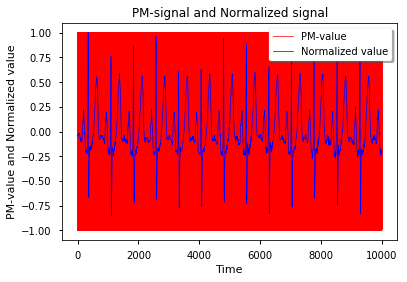

Populating the interactive namespace from numpy and matplotlib


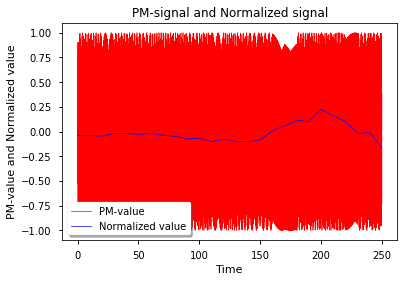

Populating the interactive namespace from numpy and matplotlib


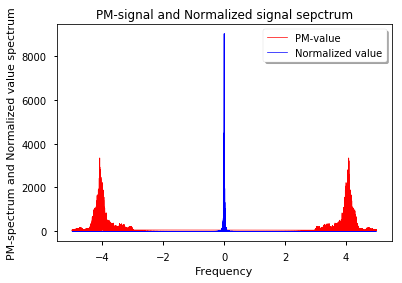

In [100]:
%pylab inline
plt.plot(time_new, phase_modulation(100), 'r', time_new, values_norm, 'b', linewidth = 0.7)# Calling the pm-modulation function
# plotting the modulated signal and the normalized signal
xlabel('Time') # label X-axis
ylabel('PM-value and Normalized value') # label Y-axis
plt.title('PM-signal and Normalized signal')
plt.legend(('PM-value', 'Normalized value'),
           loc='best', shadow=True)
plt.show()

#Enlarged:
%pylab inline
time_short= np.arange(0,250,0.1)
plt.plot( time_short, phase_modulation(100)[:2500], 'r', time_short, values_norm[:2500], 'b', linewidth = 0.7)
# Calling the pm-modulation function
# plotting the modulated signal and the normalized signal
xlabel('Time') # label X-axis
ylabel('PM-value and Normalized value') # label Y-axis
plt.title('PM-signal and Normalized signal')
plt.legend(('PM-value', 'Normalized value'),
           loc='lower left', shadow=True)
plt.show()


%pylab inline
plt.plot(freq_norm, abs(np.fft.fft(phase_modulation(100))), 'r', freq_norm, C_norm, 'b', linewidth = 0.7)
# Calling the pm-modulation function and DFT
# plotting the modulated signal and the normalized signal
xlabel('Frequency') # label X-axis
ylabel('PM-spectrum and Normalized value spectrum') # label Y-axis
plt.title('PM-signal and Normalized signal sepctrum')
plt.legend(('PM-value', 'Normalized value'),
           loc='best', shadow=True)
plt.show()